In [347]:
import pandas as pd
from constants import dataset_EDA_path
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline
import xgboost as xgb

import seaborn as sns
sns.set()

In [546]:
df = pd.read_csv(dataset_EDA_path)
#df = df[df.pull_requests_neighbours_count > 20]
#df.describe() 

In [550]:
adjusted_latency = (df['latency'] / (df.pull_requests_neighbours_latency / df.pull_requests_neighbours_count)).values
df['latency'] = pd.qcut(df['latency'], 3, labels=False) #[0 if x < 1 else 1 for x in adjusted_latency]
df['latency'].value_counts()

0    4129
1    4125
2    2061
Name: latency, dtype: int64

In [479]:
def adjust_latency(df):
    df['adj_latency'] = df.latency / (df.pull_requests_neighbours_latency / df.pull_requests_neighbours_count)
    df['latency'] = df['adj_latency']
    return df.drop(['adj_latency', 'pull_requests_neighbours_latency', 'pull_requests_neighbours_count'], axis=1)

#df= adjust_latency(df)
#df.describe()

In [553]:
y = df.latency
X = df.drop(['latency'], axis=1).select_dtypes(exclude=['object'])
#X = df.drop(['latency', 'body_count', 'title_count', 'pull_requests_neighbours_latency', 'pull_requests_neighbours_count'], axis=1).select_dtypes(exclude=['object'])
#X = df[['additions','deletions', 'commits_count']] 
scaler = MinMaxScaler()

train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

train_X = scaler.fit_transform(train_X)
test_X = scaler.transform(test_X)

In [551]:
model = XGBRegressor(n_estimators=1000, learning_rate=0.1, booster='gbtree', max_depth=3, min_child_weight=1)
model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(test_X, test_y)], verbose=False)

preds = model.predict(test_X)
rmse = np.sqrt(mean_squared_error(test_y, preds))
print(f"RMSE: {rmse} minutes")
print(f"RMSE: {rmse/60} hours")

#figure(num=None, figsize=(15, 5))
#plt.hist(test_y[:100]/60-preds[:100]/60);

RMSE: 1.354736468010619 minutes
RMSE: 0.02257894113351032 hours


In [554]:
model = XGBClassifier(n_estimators=1000, learning_rate=0.1, max_depth=3, min_child_weight=1)
model.fit(train_X, train_y, early_stopping_rounds=5, eval_set=[(test_X, test_y)], verbose=False)

preds = model.predict(test_X)
accuracy_score(test_y, preds)

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.46490887941062425

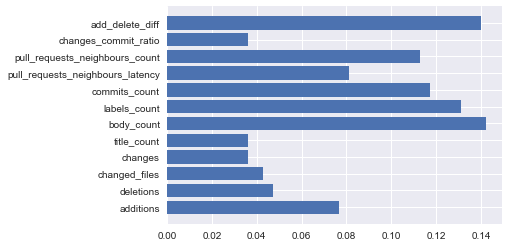

In [555]:
#fig, ax = plt.subplots(1,1,figsize=(10,10))
#xgb.plot_importance(model, max_num_features=15, ax=ax)
#[f'{column}: f{i}' for i, column in enumerate(X.columns.values)]

fig, ax = plt.subplots()
features_name = X.columns.values
y_pos = np.arange(len(features_name))

ax.set_yticks(y_pos)
ax.set_yticklabels(features_name)
ax.barh(y_pos, model.feature_importances_);

In [ ]:
# shit 
adjusted_latency = (df['latency'] / (df.pull_requests_neighbours_latency / df.pull_requests_neighbours_count)).values
df['latency'] = adjusted_latency#[0 if x < 1 else 1 for x in adjusted_latency]
df['test'] = pd.qcut(df['latency'], 2, labels=False)
#df.groupby(['test']).mean()

df.groupBy('latency')['latency'].max().latency